# Reference: Python Data Science Handbook

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%autosave 9999
%matplotlib inline
sns.set()

Autosaving every 9999 seconds


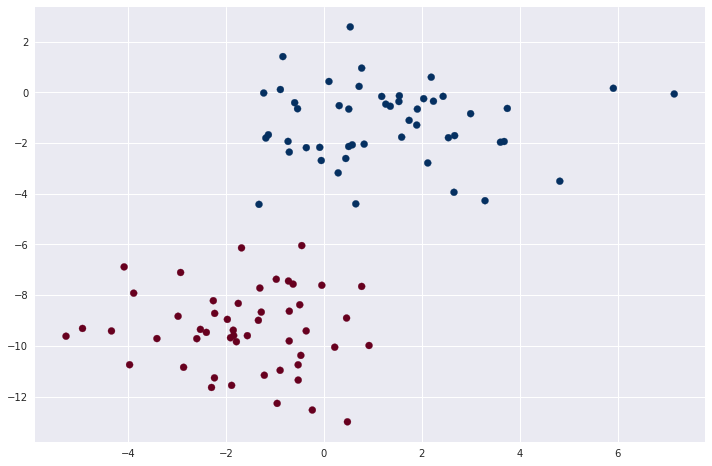

In [5]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100,2,centers=2, random_state = 2, cluster_std = 1.5)
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1],c=y,cmap='RdBu')

In [6]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X,y)

GaussianNB(priors=None)

In [7]:
rng = np.random.RandomState(0)
Xnew = [-6,-14] + [14, 18] * rng.randn(2000,2)
ynew = model.predict(Xnew)

(-5.896362448898986, 7.783374800445813, -13.784886562735293, 3.372396567255538)

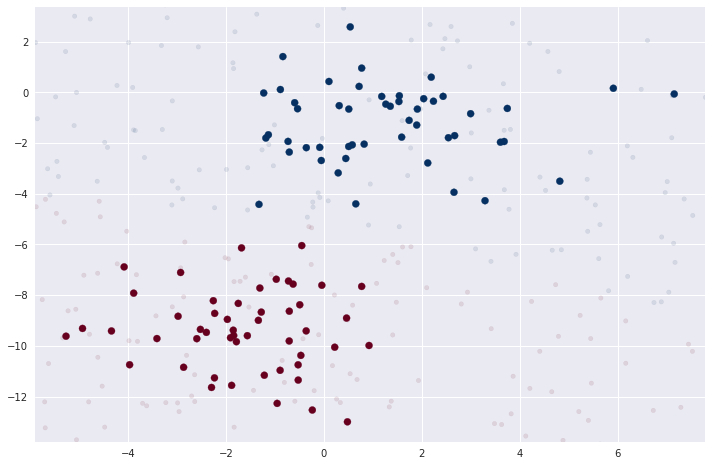

In [8]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1],c=y, s =50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:,0],Xnew[:,1],c=ynew,s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim)

In [9]:
yprob = model.predict_proba(Xnew)
yprob[1:10].round(2)

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [10]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [11]:
categories = ['talk.politics.misc','soc.religion.christian','sci.space','comp.graphics']
train = fetch_20newsgroups(subset='train',categories=categories)
test = fetch_20newsgroups(subset='test',categories=categories)

In [12]:
print(train.data[5])

From: jbatka@desire.wright.edu
Subject: Re: Gamma Ray Bursters.  WHere  are they.
Organization:  Wright State University 
Lines: 16

I assume that can only be guessed at by the assumed energy of the
event and the 1/r^2 law.  So, if the 1/r^2 law is incorrect (assume
some unknown material [dark matter??] inhibits Gamma Ray propagation),
could it be possible that we are actually seeing much less energetic
events happening much closer to us?  The even distribution could
be caused by the characteristic propagation distance of gamma rays 
being shorter then 1/2 the thickness of the disk of the galaxy.

Just some idle babbling,
-- 

   Jim Batka  | Work Email:  BATKAJ@CCMAIL.DAYTON.SAIC.COM | Elvis is
              | Home Email:  JBATKA@DESIRE.WRIGHT.EDU      |   DEAD!

    64 years is 33,661,440 minutes ...
             and a minute is a LONG time!  - Beatles:  _ Yellow Submarine_



In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(),MultinomialNB())

In [14]:
model.fit(train.data,train.target)
labels = model.predict(test.data)

Text(91.68,0.5,'predict label')

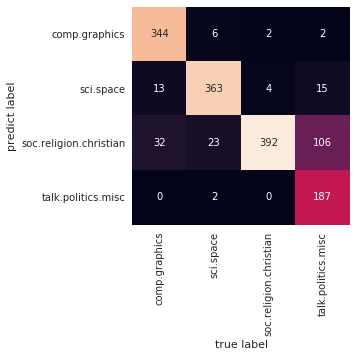

In [15]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target,labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',cbar=False,xticklabels=train.target_names,yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predict label')